In [ ]:
# HR Attrition Analysis

This project explores employee attrition data using Python, Pandas, Matplotlib, and Seaborn.  
The dataset comes from IBM and provides insights into what factors may contribute to employees leaving a company.

The goal is to identify patterns in attrition based on job roles, departments, income, overtime, age, satisfaction, and more—allowing HR teams to proactively reduce turnover.

In [11]:
## Dataset Overview

# HR Attrition Analysis: Data Load & Preview

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct path to the CSV file
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")


- **Source**: IBM HR Analytics dataset  
- **Rows**: 1470 employees  
- **Target Variable**: `Attrition` (Yes/No)
- **Feature Types**:
  - Categorical: Gender, Department, JobRole, OverTime, etc.
  - Numerical: Age, MonthlyIncome, YearsAtCompany, etc.

Data was loaded using Pandas and stored in `df`.  
A sample of the dataset is displayed below:

# Preview
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


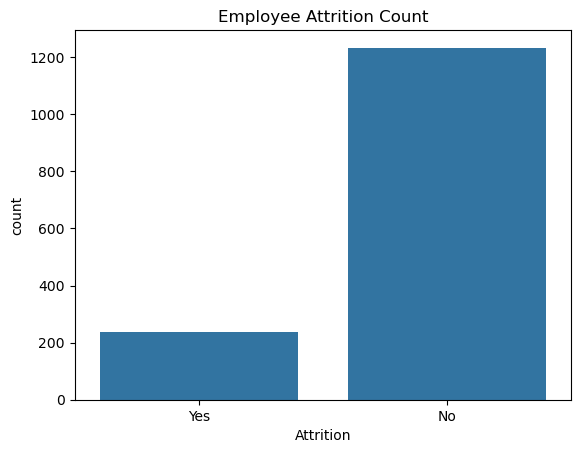

In [12]:
## Exploratory Data Analysis (EDA)

We start by visualizing key categorical features to detect patterns in employee attrition.

# Count of employees who left vs stayed
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()


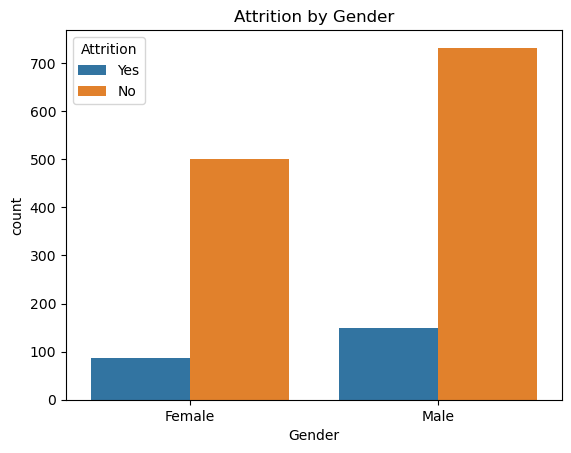

In [13]:
## Exploratory Data Analysis (EDA)

We start by visualizing key categorical features to detect patterns in employee attrition.

sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Attrition by Gender")
plt.show()


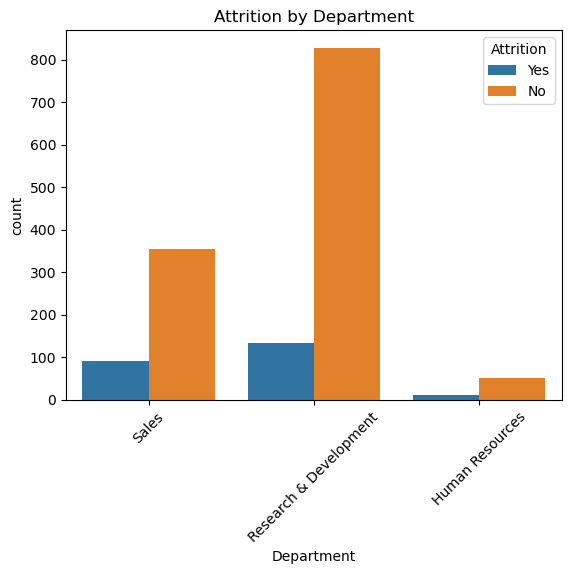

In [14]:
## Exploratory Data Analysis (EDA)

We start by visualizing key categorical features to detect patterns in employee attrition.

sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


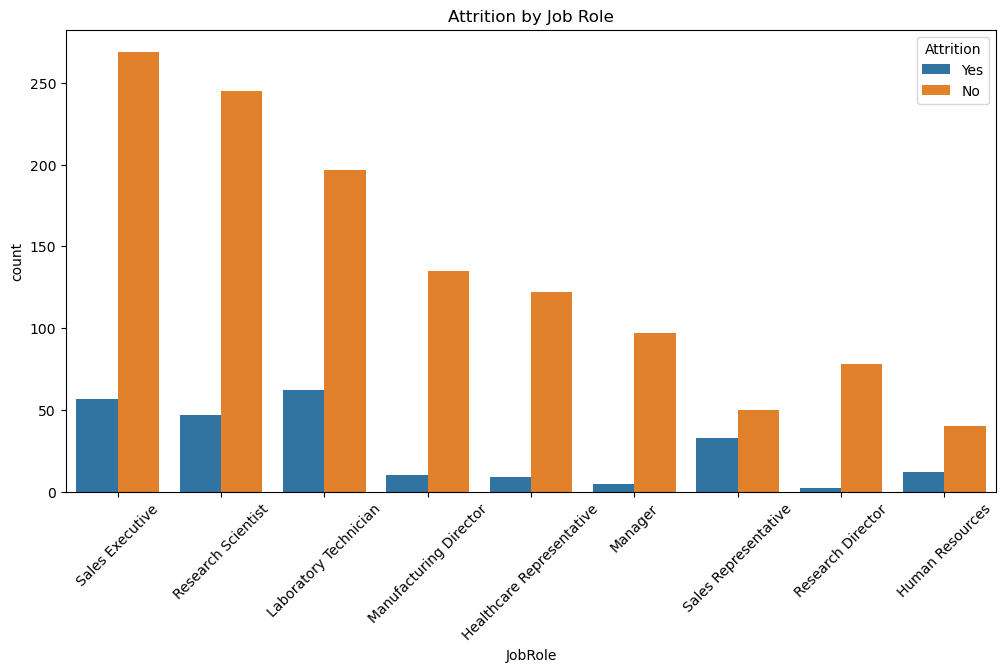

In [15]:
## Exploratory Data Analysis (EDA)

We start by visualizing key categorical features to detect patterns in employee attrition.

plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()


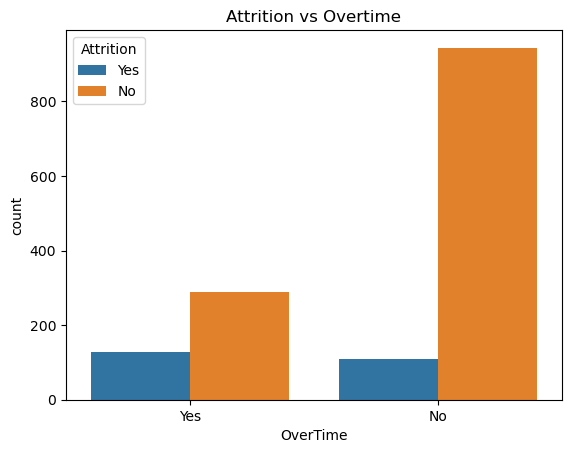

In [16]:
## Exploratory Data Analysis (EDA)

We start by visualizing key categorical features to detect patterns in employee attrition.

sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition vs Overtime")
plt.show()


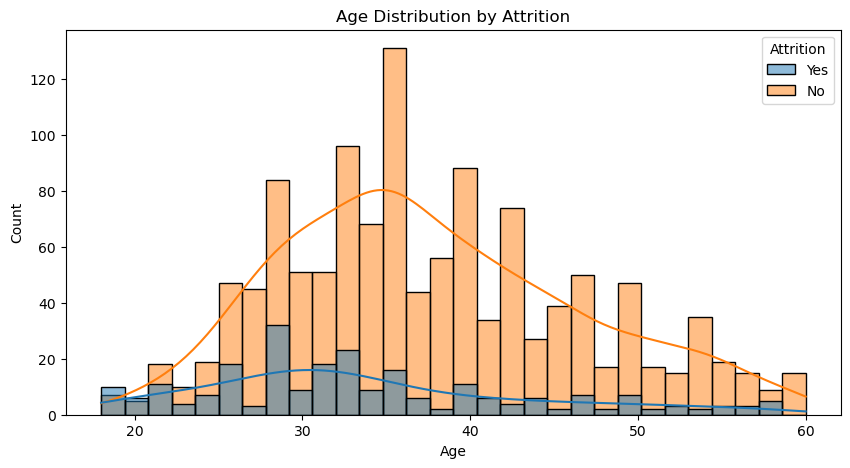

In [17]:
## Numeric Feature Analysis

Next, we explore numeric features like Age, Monthly Income, and Satisfaction using histograms and boxplots. These help reveal differences between employees who stayed and those who left.

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=30)
plt.title("Age Distribution by Attrition")
plt.show()


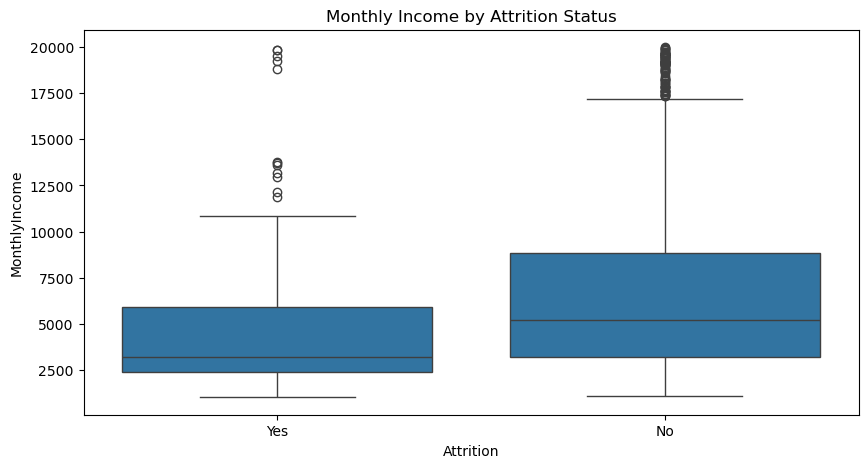

In [18]:
## Numeric Feature Analysis

Next, we explore numeric features like Age, Monthly Income, and Satisfaction using histograms and boxplots. These help reveal differences between employees who stayed and those who left.

plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition Status")
plt.show()


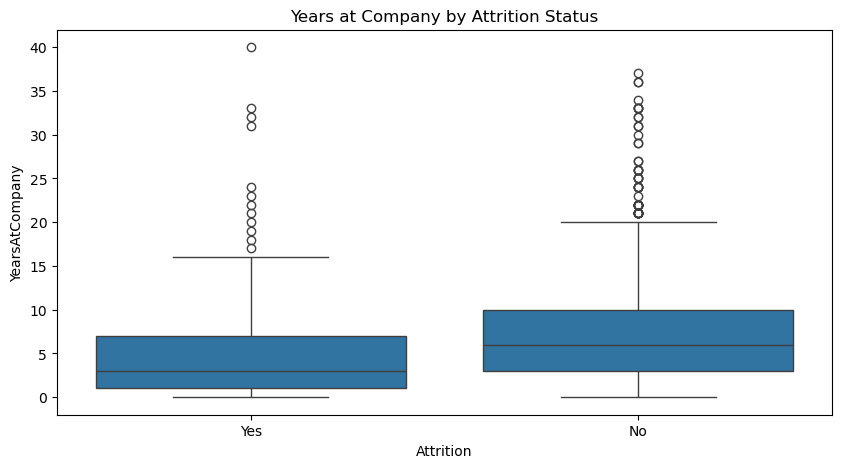

In [19]:
## Numeric Feature Analysis

Next, we explore numeric features like Age, Monthly Income, and Satisfaction using histograms and boxplots. These help reveal differences between employees who stayed and those who left.

plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Years at Company by Attrition Status")
plt.show()


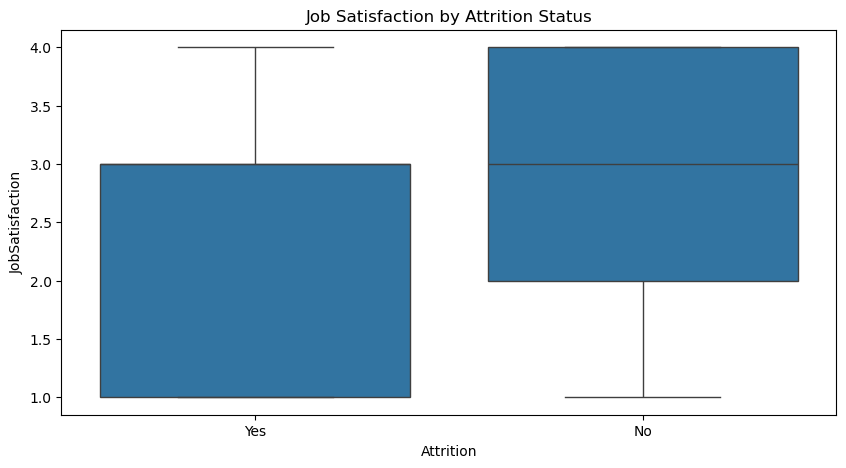

In [20]:
## Numeric Feature Analysis

Next, we explore numeric features like Age, Monthly Income, and Satisfaction using histograms and boxplots. These help reveal differences between employees who stayed and those who left.

plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction by Attrition Status")
plt.show()


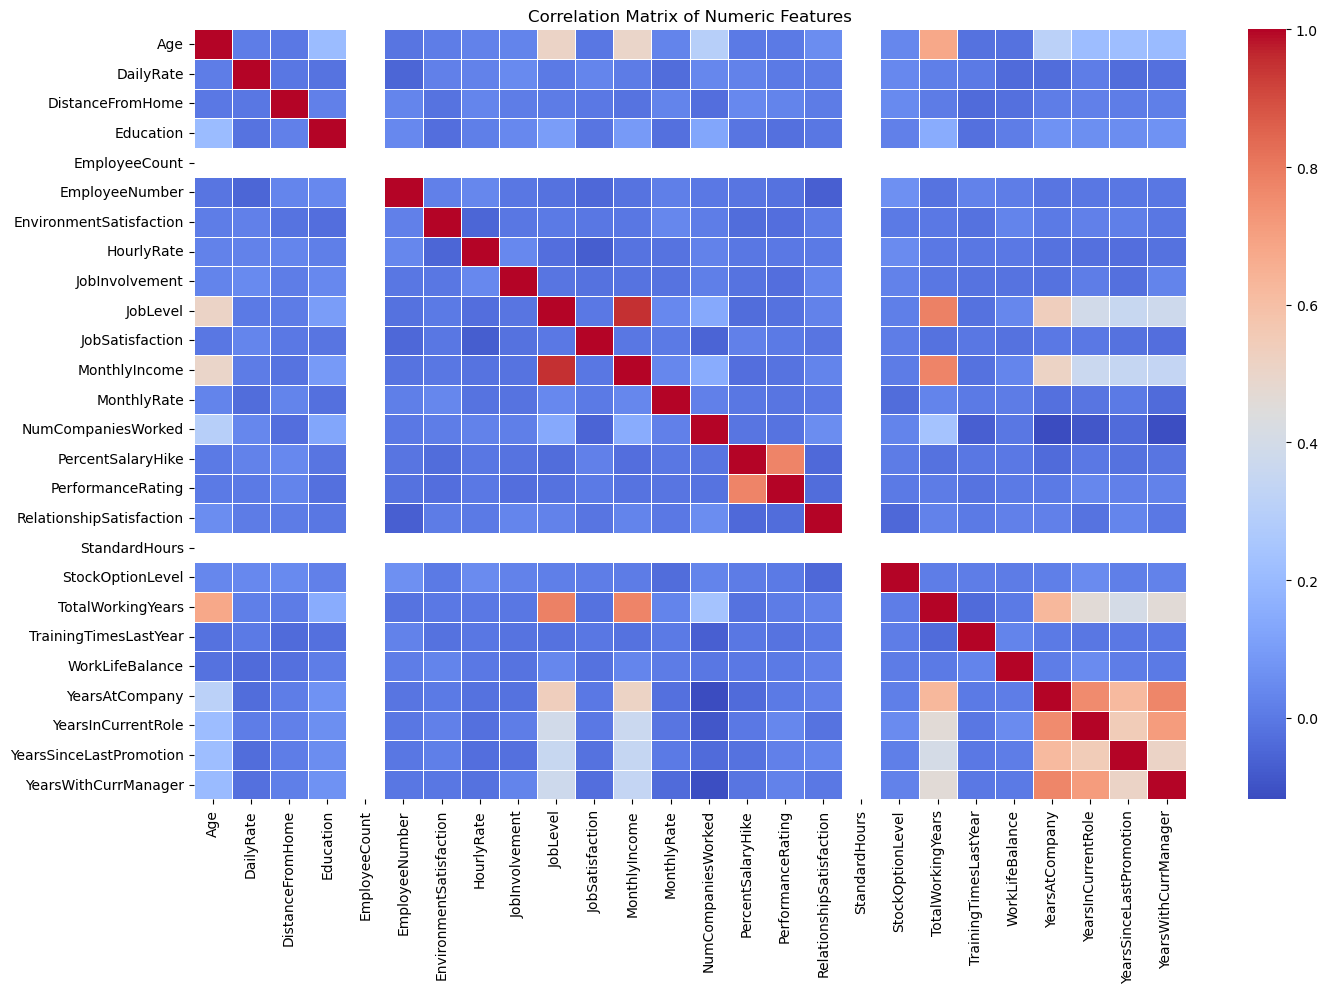

In [21]:
## Correlation & Averages

We compute a correlation matrix and group-wise means to quantify numeric relationships and identify distinguishing traits of employees who left.

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [22]:
## Correlation & Averages

We compute a correlation matrix and group-wise means to quantify numeric relationships and identify distinguishing traits of employees who left.

# Group by Attrition and compute mean of numeric columns
grouped_means = df.groupby('Attrition')[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'DistanceFromHome', 'NumCompaniesWorked']].mean()
grouped_means


,Age,MonthlyIncome,YearsAtCompany,JobSatisfaction,DistanceFromHome,NumCompaniesWorked
Attrition,,,,,,
No,37.561233,6832.739659,7.369019,2.778589,8.915653,2.645580
Yes,33.607595,4787.092827,5.130802,2.468354,10.632911,2.940928


In [ ]:
## Key Findings

- **OverTime** is strongly correlated with attrition. Employees working overtime are more likely to leave.
- **Younger employees** and those with **lower income** or **shorter tenure** show higher attrition.
- **Job roles** such as Sales Representative and Laboratory Technician had visibly higher attrition rates.
- Employees with **lower job satisfaction** are more likely to exit.

These trends could guide targeted HR interventions.


In [ ]:
## Conclusion

Attrition isn't random—it correlates with workload, satisfaction, compensation, and tenure.  
Organizations should:
- Monitor and manage overtime
- Invest in early-career support
- Prioritize role-specific retention efforts
- Focus on boosting employee engagement

This notebook demonstrates how HR and analytics can work hand-in-hand to improve retention.
